In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='whitegrid')

# Reproducibility
SEED = 42
rng = np.random.default_rng(SEED)

diab = pd.read_csv('diabetes.csv')
diab.info()
diab.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
sample_idx = rng.choice(diab.index, size=25, replace=False)
sample = diab.loc[sample_idx].copy()

pop_mean = diab['Glucose'].mean()
pop_max = diab['Glucose'].max()

samp_mean = sample['Glucose'].mean()
samp_max = sample['Glucose'].max()

print({'sample_mean': samp_mean, 'pop_mean': pop_mean,
       'sample_max': samp_max, 'pop_max': pop_max})



{'sample_mean': np.float64(118.88), 'pop_mean': np.float64(120.89453125), 'sample_max': 197, 'pop_max': 199}


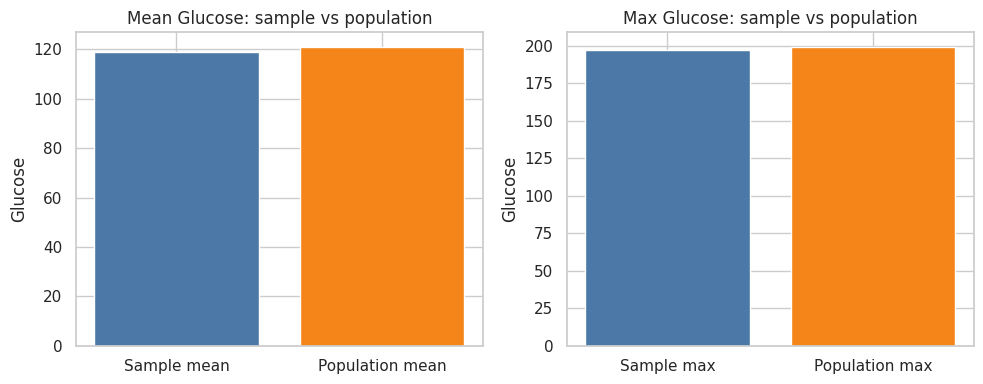

In [7]:
import os

# Chart: bar comparison
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(['Sample mean','Population mean'], [samp_mean, pop_mean], color=['#4c78a8','#f58518'])
ax[0].set_ylabel('Glucose')
ax[0].set_title('Mean Glucose: sample vs population')

ax[1].bar(['Sample max','Population max'], [samp_max, pop_max], color=['#4c78a8','#f58518'])
ax[1].set_ylabel('Glucose')
ax[1].set_title('Max Glucose: sample vs population')

plt.tight_layout()

# Create the 'figures' directory if it doesn't exist
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/diabetes_glucose_mean_max.png', dpi=150)
plt.show()

Findings:

 Both the mean and maximum glucose values in the sample closely match those of the population, which suggests that even a small, randomly selected sample can reflect key characteristics of the larger dataset.

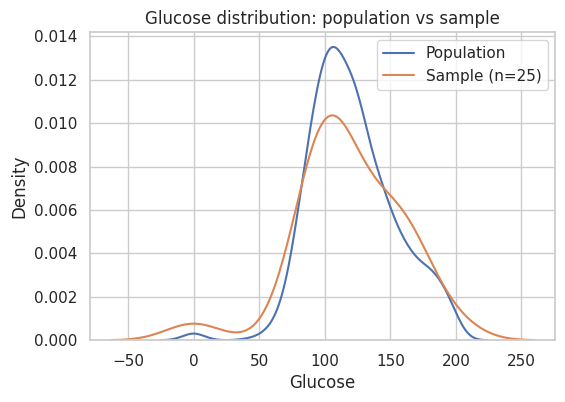

In [8]:
# Distribution overlay
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(diab['Glucose'], label='Population', ax=ax)
sns.kdeplot(sample['Glucose'], label='Sample (n=25)', ax=ax)
ax.legend()
ax.set_title('Glucose distribution: population vs sample')
plt.savefig('figures/diabetes_glucose_density.png', dpi=150)
plt.show()


Findings:

This graph shows how the glucose levels are distributed in the population compared to a random sample of 25 individuals. The two curves. One for the population and one for the sample illustrate that the sample roughly follows the same shape as the population, though with more variability due to its smaller size.

{'sample_p98_bmi': np.float64(51.052), 'pop_p98_bmi': np.float64(47.52599999999996)}


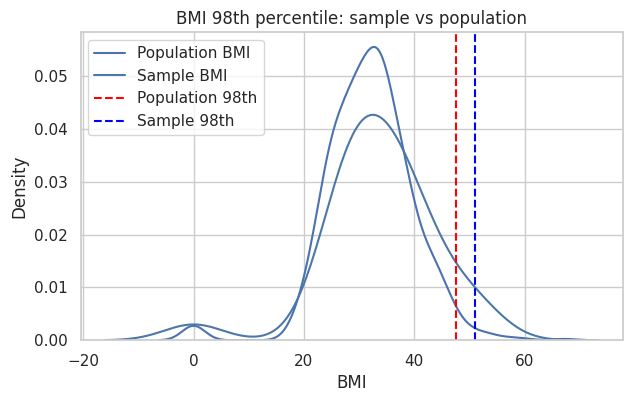

In [9]:
pop_p98_bmi = np.percentile(diab['BMI'].dropna(), 98)
samp_p98_bmi = np.percentile(sample['BMI'].dropna(), 98)

print({'sample_p98_bmi': samp_p98_bmi, 'pop_p98_bmi': pop_p98_bmi})

# Chart: lines on distribution
fig, ax = plt.subplots(figsize=(7,4))
sns.kdeplot(diab['BMI'], label='Population BMI', ax=ax)
sns.kdeplot(sample['BMI'], label='Sample BMI', ax=ax, color='#4c78a8')
ax.axvline(pop_p98_bmi, color='red', linestyle='--', label='Population 98th')
ax.axvline(samp_p98_bmi, color='blue', linestyle='--', label='Sample 98th')
ax.legend()
ax.set_title('BMI 98th percentile: sample vs population')
plt.savefig('figures/diabetes_bmi_p98.png', dpi=150)
plt.show()


Findings:

The graph shows that while the sample BMI distribution roughly follows the population trend, the 98th percentile in the sample deviates noticeably, highlighting how extreme values can vary in small samples.

In [10]:
BP = diab['BloodPressure'].dropna().values
pop_stats = {
    'mean': BP.mean(),
    'std': BP.std(ddof=1),
    'p98': np.percentile(BP, 98)
}

boot_means, boot_stds, boot_p98 = [], [], []
n_boot, n_size = 500, 150

for _ in range(n_boot):
    boot_idx = rng.choice(len(BP), size=n_size, replace=True)
    bs = BP[boot_idx]
    boot_means.append(bs.mean())
    boot_stds.append(bs.std(ddof=1))
    boot_p98.append(np.percentile(bs, 98))

boot_df = pd.DataFrame({'mean': boot_means, 'std': boot_stds, 'p98': boot_p98})
boot_avg = boot_df.mean().to_dict()

print('Population:', pop_stats)
print('Bootstrap averages:', boot_avg)


Population: {'mean': np.float64(69.10546875), 'std': np.float64(19.355807170644777), 'p98': np.float64(99.31999999999994)}
Bootstrap averages: {'mean': 69.13809333333333, 'std': 19.04431596449022, 'p98': 97.79340000000002}


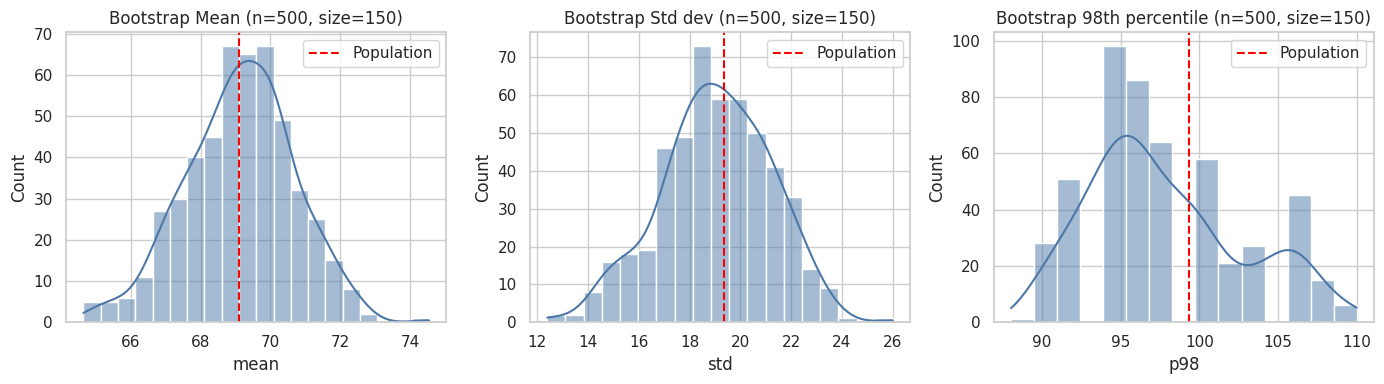

In [11]:
# Charts: distributions with population reference lines
fig, axes = plt.subplots(1,3, figsize=(14,4))
for ax, col, label in zip(axes, ['mean','std','p98'], ['Mean','Std dev','98th percentile']):
    sns.histplot(boot_df[col], kde=True, ax=ax, color='#4c78a8')
    ax.axvline(pop_stats['mean' if col=='mean' else col], color='red', linestyle='--', label='Population')
    ax.set_title(f'Bootstrap {label} (n={n_boot}, size={n_size})')
    ax.legend()
plt.tight_layout()
plt.savefig('figures/diabetes_bp_bootstrap_stats.png', dpi=150)
plt.show()


Findings:

The bootstrap histograms illustrate how sample estimates for mean, standard deviation, and 98th percentile of BloodPressure consistently cluster around the population values.